<a href="https://colab.research.google.com/github/teim-projects/Group3_Fouling_Factor_Prediction_in_Heat_Exchanger/blob/main/Randomforest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
!pip install ipython-autotime
%load_ext autotime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 18.7 MB/s eta 0:00:00
time: 432 µs (started: 2023-04-20 10:05:31 +00:00)


In [ ]:
df=pd.read_csv("/content/HeatEx (1) (2).csv")

time: 13.8 ms (started: 2023-04-20 10:05:31 +00:00)


<ipython-input-4-02d373265b53>:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df.iloc[:,0]=pd.to_datetime(df.iloc[:,0],infer_datetime_format=True)
<ipython-input-4-02d373265b53>:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:,0]=pd.to_datetime(df.iloc[:,0],infer_datetime_format=True)


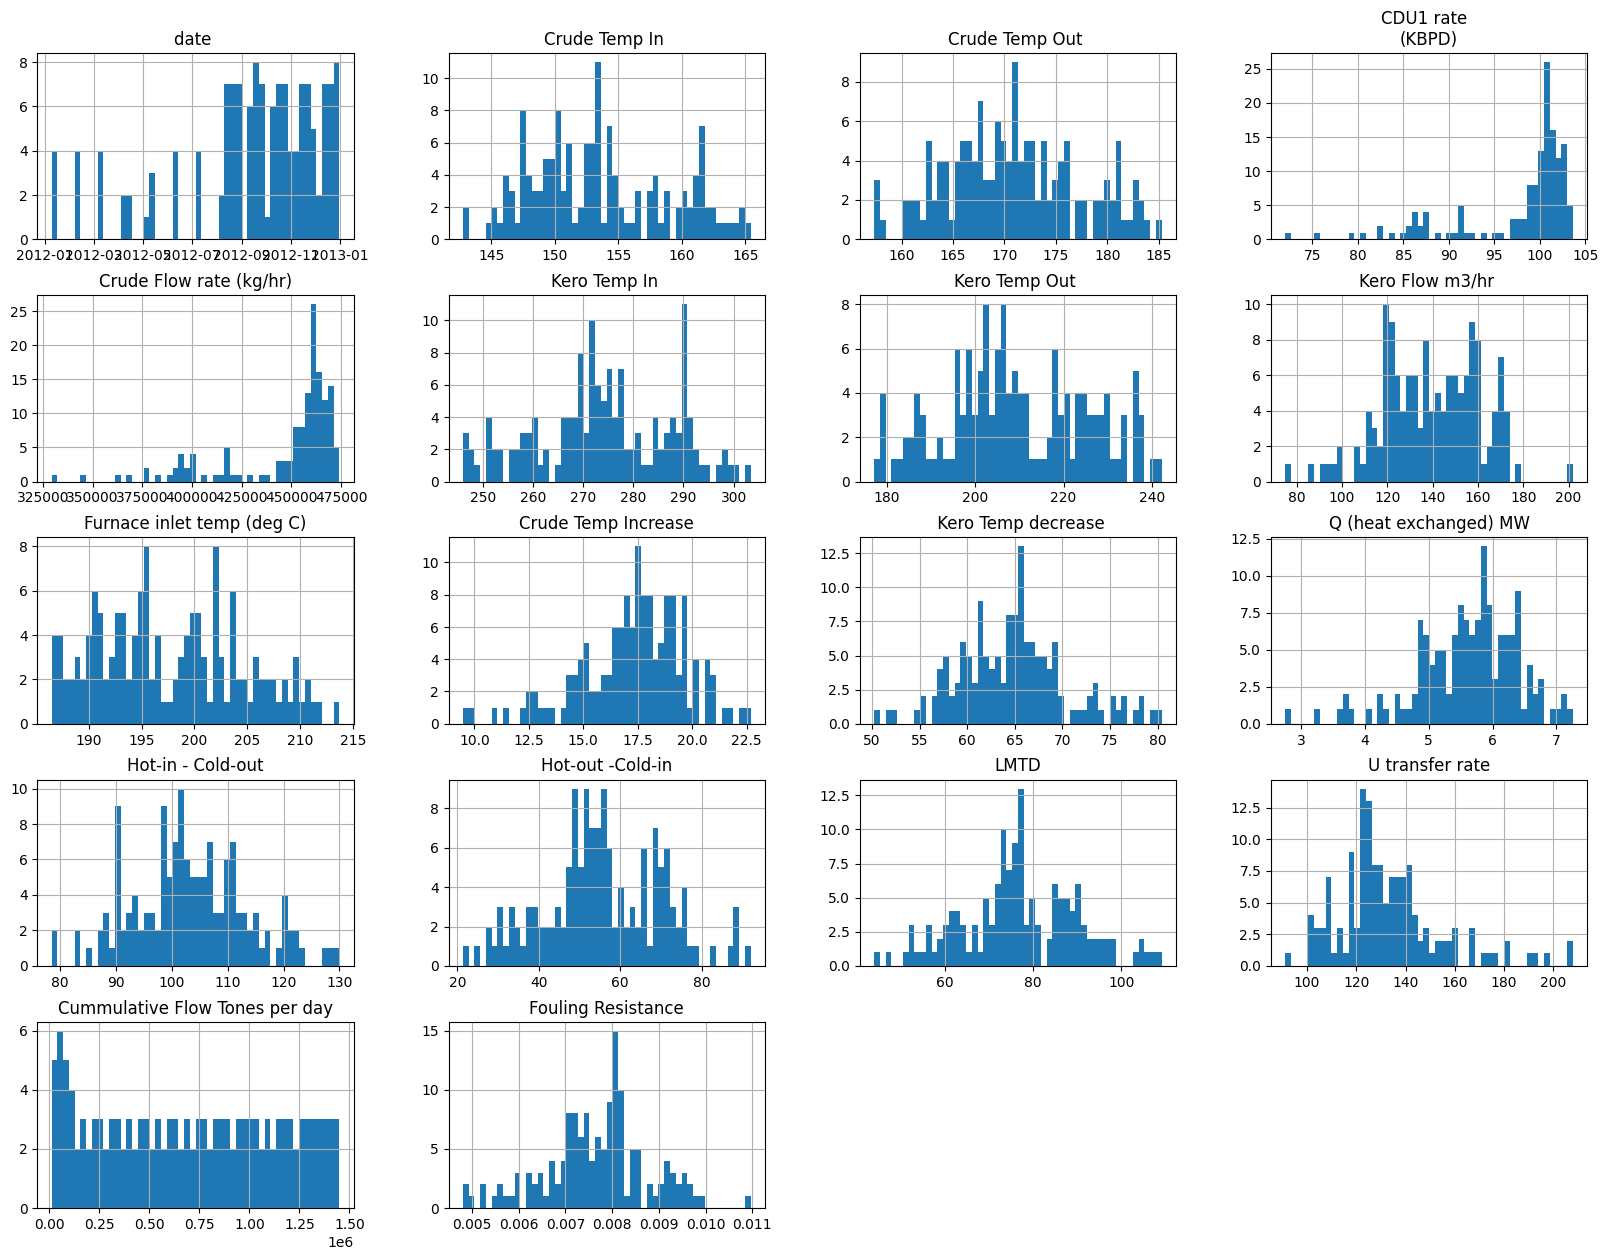

time: 4.74 s (started: 2023-04-20 10:05:31 +00:00)


In [ ]:

Head = df.head()
df.iloc[:,0]
df.iloc[:,0]=pd.to_datetime(df.iloc[:,0],infer_datetime_format=True)
# Data Visualization on the the whole dataset
df.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
df.head()

,date,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
0,2012-10-08,154.797468,177.4809,92.3039,422179.6756,271.043339,190.6146,136.8106,207.5520,22.683415,80.428749,6.969547,93.562456,35.817122,60.138664,207.988664,106221.55350,0.004808
1,2012-11-08,161.205191,183.0916,91.9925,420755.3364,273.865702,196.0065,136.6347,210.7414,21.886404,77.859194,6.701976,90.774108,34.801317,58.382904,206.018413,96089.24125,0.004854
2,2012-12-08,161.716401,182.7077,91.2404,417315.4098,273.570223,195.3727,128.8922,210.1902,20.991333,78.197497,6.375338,90.862489,33.656324,57.600946,198.638082,85991.11318,0.005034
3,2012-08-13,161.664472,182.4263,91.1133,416734.0860,274.840761,196.3050,127.0754,209.7074,20.761857,78.535805,6.296860,92.414432,34.640484,58.877303,191.939783,75975.54334,0.005210
4,2012-08-14,160.344884,181.3518,94.0905,430351.1419,277.083239,197.6055,130.7324,208.2693,21.006871,79.477697,6.579352,95.731484,37.260659,61.965087,190.557021,65973.92528,0.005248


time: 43.1 ms (started: 2023-04-20 10:05:36 +00:00)


<Axes: xlabel='U transfer rate'>

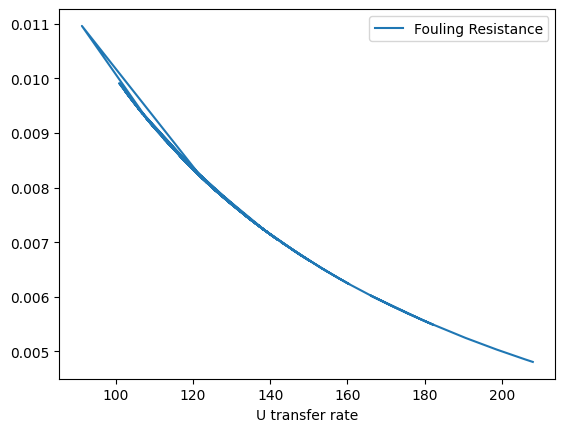

time: 293 ms (started: 2023-04-20 10:05:36 +00:00)


In [ ]:

df.plot(x="U transfer rate",y="Fouling Resistance")


In [ ]:
#used to view some basic statistical details like count, mean, std etc.
df.describe()

,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
count,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,143.000000,143.000000,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000,1.440000e+02,144.000000
mean,153.544069,170.877266,97.706931,446891.965429,274.154006,209.392654,139.265844,197.691331,17.324805,64.761350,5.626905,103.276746,55.848587,76.951738,133.282967,7.018133e+05,0.007674
std,5.411791,6.415570,6.401881,29280.922559,13.353951,15.888893,21.530078,6.779373,2.412717,5.717098,0.791494,10.198593,14.447668,13.084653,21.261519,4.393528e+05,0.001108
min,142.756503,157.339800,72.020900,329409.230100,246.013105,177.069800,75.097300,186.486100,9.477060,50.226779,2.753764,78.583708,21.382670,43.947263,91.233181,1.137760e+04,0.004808
25%,149.381263,166.358700,97.360775,445308.771950,266.609215,198.379625,122.457500,192.314650,16.099955,61.092454,5.161457,96.995058,48.096081,69.609184,121.663403,3.087114e+05,0.007086
50%,153.089259,170.680350,100.503100,459681.118250,273.627975,207.073550,139.788200,196.533100,17.573561,64.788801,5.709552,102.713266,54.693614,76.483771,129.361246,7.041816e+05,0.007731
75%,157.745850,175.281075,101.579575,464604.520800,285.443647,222.290100,156.589925,202.437500,18.945654,67.654399,6.164090,109.670054,66.249044,86.410411,141.119314,1.081795e+06,0.008219
max,165.395553,185.295900,103.648300,474066.585900,303.373740,242.264200,201.930800,213.707100,22.683415,80.428749,7.260466,129.969752,91.988030,109.215960,207.988664,1.449615e+06,0.010961


time: 61.7 ms (started: 2023-04-20 10:05:36 +00:00)


In [ ]:
# make all numeric to float.
df.dtypes
for x in df:
     if df[x].dtypes == "int64":
        df[x] = df[x].astype(float)
print (df[x].dtypes)

float64
time: 2.27 ms (started: 2023-04-20 10:05:36 +00:00)


In [ ]:
#Preparing Data for training
df = df.select_dtypes(exclude=['object'])# remove object
df=df.fillna(df.mean())# all NaN values, we are removing that row.
X = df.drop('Fouling Resistance',axis=1)
y = df['Fouling Resistance']
X

<ipython-input-9-6a51f94eee7f>:3: FutureWarning: DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.
  df=df.fillna(df.mean())# all NaN values, we are removing that row.


,date,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day
0,2012-10-08,154.797468,177.4809,92.3039,422179.6756,271.043339,190.6146,136.8106,207.5520,22.683415,80.428749,6.969547,93.562456,35.817122,60.138664,207.988664,1.062216e+05
1,2012-11-08,161.205191,183.0916,91.9925,420755.3364,273.865702,196.0065,136.6347,210.7414,21.886404,77.859194,6.701976,90.774108,34.801317,58.382904,206.018413,9.608924e+04
2,2012-12-08,161.716401,182.7077,91.2404,417315.4098,273.570223,195.3727,128.8922,210.1902,20.991333,78.197497,6.375338,90.862489,33.656324,57.600946,198.638082,8.599111e+04
3,2012-08-13,161.664472,182.4263,91.1133,416734.0860,274.840761,196.3050,127.0754,209.7074,20.761857,78.535805,6.296860,92.414432,34.640484,58.877303,191.939783,7.597554e+04
4,2012-08-14,160.344884,181.3518,94.0905,430351.1419,277.083239,197.6055,130.7324,208.2693,21.006871,79.477697,6.579352,95.731484,37.260659,61.965087,190.557021,6.597393e+04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
139,2012-12-27,147.816959,165.3204,102.7999,470185.9975,287.728616,236.2713,169.0765,187.1293,17.503472,51.457355,5.989529,122.408186,88.454302,104.513625,102.851032,1.405225e+06
140,2012-12-28,149.264486,166.9163,101.9233,466176.5803,288.575530,238.3488,172.7897,189.3222,17.651789,50.226779,5.988774,121.659255,89.084265,104.527149,102.824769,1.416414e+06
141,2012-12-29,150.276124,169.3887,100.1238,457946.2988,297.859970,242.2642,166.8212,188.3233,19.112534,55.595815,6.369885,128.471312,91.988030,109.215960,104.672933,1.427404e+06
142,2012-12-30,150.637563,170.1837,100.7615,460862.7478,300.153481,237.9598,155.0901,186.5770,19.546166,62.193675,6.555895,129.969752,87.322243,107.236312,109.718283,1.438465e+06


time: 47.5 ms (started: 2023-04-20 10:05:36 +00:00)


In [ ]:
df.drop(df.columns[[0]], axis=1,inplace=True)
df.head()

,Crude Temp In,Crude Temp Out,CDU1 rate \n(KBPD),Crude Flow rate (kg/hr),Kero Temp In,Kero Temp Out,Kero Flow m3/hr,Furnace inlet temp (deg C),Crude Temp Increase,Kero Temp decrease,Q (heat exchanged) MW,Hot-in - Cold-out,Hot-out -Cold-in,LMTD,U transfer rate,Cummulative Flow Tones per day,Fouling Resistance
0,154.797468,177.4809,92.3039,422179.6756,271.043339,190.6146,136.8106,207.5520,22.683415,80.428749,6.969547,93.562456,35.817122,60.138664,207.988664,106221.55350,0.004808
1,161.205191,183.0916,91.9925,420755.3364,273.865702,196.0065,136.6347,210.7414,21.886404,77.859194,6.701976,90.774108,34.801317,58.382904,206.018413,96089.24125,0.004854
2,161.716401,182.7077,91.2404,417315.4098,273.570223,195.3727,128.8922,210.1902,20.991333,78.197497,6.375338,90.862489,33.656324,57.600946,198.638082,85991.11318,0.005034
3,161.664472,182.4263,91.1133,416734.0860,274.840761,196.3050,127.0754,209.7074,20.761857,78.535805,6.296860,92.414432,34.640484,58.877303,191.939783,75975.54334,0.005210
4,160.344884,181.3518,94.0905,430351.1419,277.083239,197.6055,130.7324,208.2693,21.006871,79.477697,6.579352,95.731484,37.260659,61.965087,190.557021,65973.92528,0.005248


time: 26.5 ms (started: 2023-04-20 10:05:36 +00:00)


In [ ]:
#df['date ']=pd.to_datetime(df['date '],infer_datetime_format=True)
print(df.info())
#df['date '] = pd.to_datetime(df['date '])
#df.set_axis(df['date '], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Crude Temp In                   144 non-null    float64
 1   Crude Temp Out                  144 non-null    float64
 2   CDU1 rate  
(KBPD)              144 non-null    float64
 3   Crude Flow rate (kg/hr)         144 non-null    float64
 4   Kero Temp In                    144 non-null    float64
 5   Kero Temp Out                   144 non-null    float64
 6   Kero Flow m3/hr                 144 non-null    float64
 7   Furnace inlet temp (deg C)      144 non-null    float64
 8   Crude Temp Increase             144 non-null    float64
 9    Kero Temp decrease             144 non-null    float64
 10  Q (heat exchanged) MW           144 non-null    float64
 11  Hot-in - Cold-out               144 non-null    float64
 12  Hot-out -Cold-in                144 

In [ ]:
df = df.select_dtypes(exclude=['object'])
df=df.fillna(df.mean())


X = df.drop('Fouling Resistance',axis=1)
y = df['Fouling Resistance']

time: 15.4 ms (started: 2023-04-20 10:05:36 +00:00)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

time: 1.33 s (started: 2023-04-20 10:05:36 +00:00)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 1000, random_state = 42) #random forest with 1000 decision trees.
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=1000, random_state=42)

time: 3.24 s (started: 2023-04-20 10:05:38 +00:00)


In [ ]:
y_pred = regressor.predict(X_test)# predict the Fouling Resistance 

time: 94.8 ms (started: 2023-04-20 10:05:41 +00:00)


In [ ]:
#check the difference between the actual and predicted values.
df=pd.DataFrame({'Actual':y_test, 'Predicted':y_pred})
df

,Actual,Predicted
7,0.005974,0.005979
89,0.008282,0.008216
97,0.008551,0.008550
26,0.006524,0.006539
110,0.008029,0.008036
128,0.008778,0.008908
59,0.008005,0.008007
22,0.006976,0.006978
129,0.009031,0.009251
16,0.006232,0.006207


time: 18.7 ms (started: 2023-04-20 10:05:41 +00:00)


In [ ]:
from sklearn import metrics

print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.0020026620705206e-05
Mean Squared Error: 4.781997334828224e-09
Root Mean Squared Error: 6.915198720809275e-05
time: 14.3 ms (started: 2023-04-20 10:05:41 +00:00)


In [ ]:
errors = abs(y_pred - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')

# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.0 degrees.
Accuracy: 99.52 %.
time: 6.1 ms (started: 2023-04-20 10:05:41 +00:00)


<ipython-input-19-687b7ca9c3a4>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
<ipython-input-19-687b7ca9c3a4>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


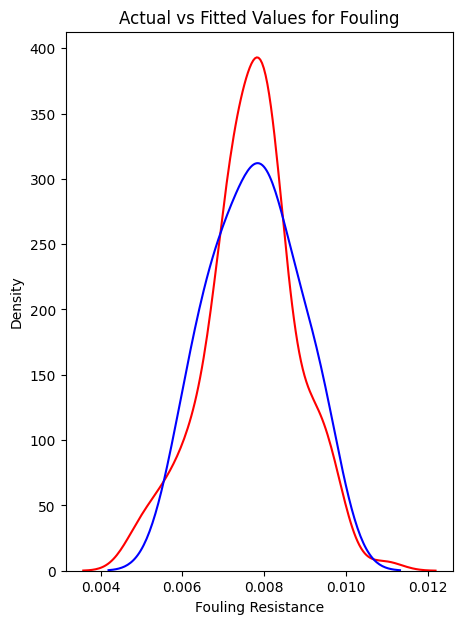

time: 535 ms (started: 2023-04-20 10:05:41 +00:00)


In [ ]:
import seaborn as sns
plt.figure(figsize=(5, 7))


ax = sns.distplot(y, hist=False, color="r", label="Actual Value")
sns.distplot(y_pred, hist=False, color="b", label="Fitted Values" , ax=ax)


plt.title('Actual vs Fitted Values for Fouling')


plt.show()
plt.close()

In [ ]:
model = RandomForestRegressor(n_estimators=500, random_state=42, min_samples_split=2, min_samples_leaf=1, max_depth=10, bootstrap=True)
model.fit(X_train, y_train)
predict = model.predict(X_test)
print(predict)
print(predict.shape)

[0.00598587 0.00821727 0.00854788 0.00652877 0.00803602 0.00891458
 0.00800785 0.00698331 0.00922803 0.0062098  0.00822374 0.0093354
 0.0067199  0.00721076 0.007461   0.0073809  0.00654219 0.00584264
 0.00891586 0.0076729  0.00790909 0.008235   0.00671284 0.00938704
 0.00706184 0.00781494 0.0075552  0.00969446 0.00849963]
(29,)
time: 1.11 s (started: 2023-04-20 10:05:42 +00:00)


In [ ]:
print("Mean Absolute Error:", round(metrics.mean_absolute_error(y_test, predict), 4))
print("Mean Squared Error:", round(metrics.mean_squared_error(y_test, predict), 4))
print("Root Mean Squared Error:", round(np.sqrt(metrics.mean_squared_error(y_test, predict)), 4))
print("(R^2) Score:", round(metrics.r2_score(y_test, predict), 4))
print(f'Train Score : {model.score(X_train, y_train) * 100:.2f}% and Test Score : {model.score(X_test, y_test) * 100:.2f}% using Random Tree Regressor.')
errors = abs(predict - y_test)
mape = 100 * (errors / y_test)
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.') 

Mean Absolute Error: 0.0
Mean Squared Error: 0.0
Root Mean Squared Error: 0.0001
(R^2) Score: 0.9955
Train Score : 99.75% and Test Score : 99.55% using Random Tree Regressor.
Accuracy: 99.52 %.
time: 113 ms (started: 2023-04-20 10:05:43 +00:00)


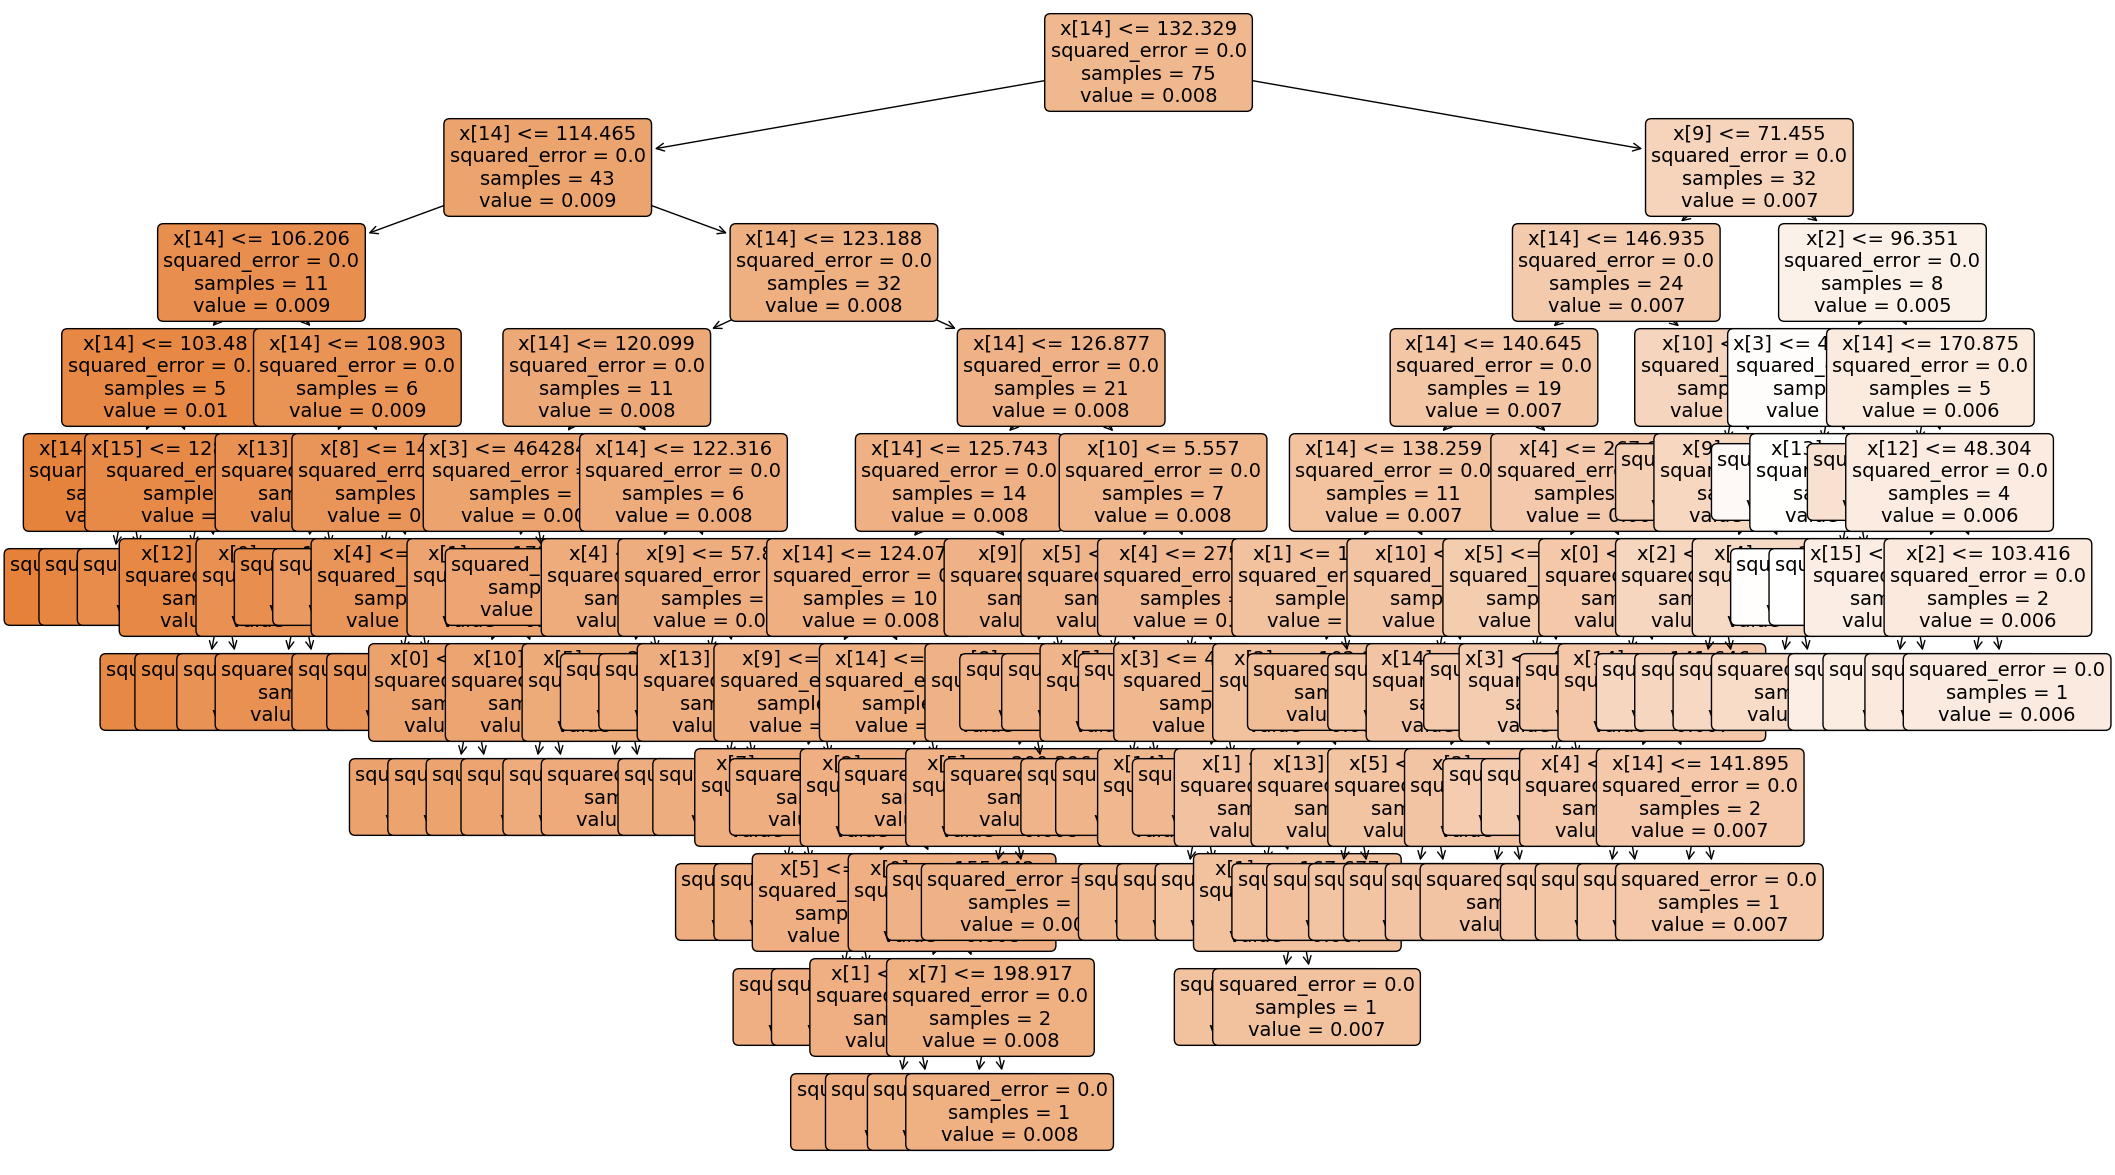

time: 9.86 s (started: 2023-04-20 10:05:43 +00:00)


In [ ]:
import pydot
# Pull out one tree from the forest
Tree = regressor.estimators_[5]
# Export the image to a dot file
from sklearn import tree
plt.figure(figsize=(25,15)) #visualize the Random Forest tree.
tree.plot_tree(Tree,filled=True,rounded=True,fontsize=14);

In [ ]:
# Make a prediction for a new data point
new_data = [[5.5, 300, 10, 0.2,487,10,3,78,50,100,12,13,15,23,25,26]] # values for the input variables
prediction = model.predict(new_data)

print("The predicted fouling resistance is:", prediction[0])

# Evaluate the model
test_predictions = model.predict(X_test)
#mse = mean_squared_error(y_test, test_predictions)
#print('Mean Squared Error:', mse)


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


The predicted fouling resistance is: 0.010168998079999955
time: 371 ms (started: 2023-04-20 10:05:53 +00:00)
